**NULL HYPOTHESIS**:No difference in the ages of the smoking
and non-smoking mothers.
# Uo : **AGE** smoking = **AGE** non-smoking

**ALTERNATIVE HYPOTHESIS:** the average age of mothers who smoked is less than
those who did not smoke
#Ua : **AGE** smoking < **AGE** non-smoking


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [9]:
df=pd.read_csv('/content/drive/MyDrive/test.csv')
df

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [10]:
data = df[['Maternal Age','Maternal Smoker']]
data

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,28,True
3,23,True
4,25,False
...,...,...
1169,27,False
1170,24,False
1171,30,True
1172,21,False


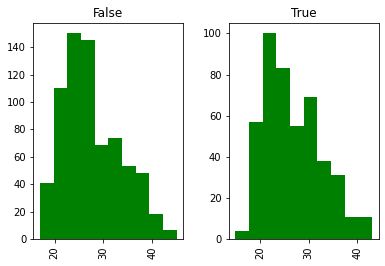

In [28]:
data.hist(column='Maternal Age', by='Maternal Smoker', color="green");


In [11]:
data['Maternal Age'] == True

0       False
1       False
2       False
3       False
4       False
        ...  
1169    False
1170    False
1171    False
1172    False
1173    False
Name: Maternal Age, Length: 1174, dtype: bool

In [12]:
d1=data['Maternal Smoker']==True

In [13]:
smoker = data['Maternal Age'] [data['Maternal Smoker'] == True]
smoker

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [14]:
nonsmoker = data['Maternal Age'] [data['Maternal Smoker'] == False]
nonsmoker

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13350a4220>,
      dtype=object)

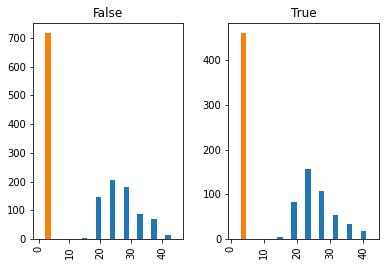

In [15]:
data.hist(by ='Maternal Smoker')

# Which statistical test would you employ?(2)

The alternative hypothesis compares the average maternal age of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

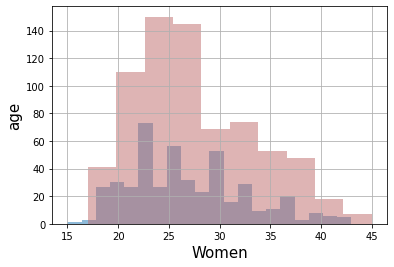

In [18]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20) 
nonsmoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('age',fontsize=15)
plt.show()

# What statistic do you recommend to apply for this case(2)?

Random permutation the difference of the two new group means: the mean of the shuffled age assigned to the smokers and the mean of the shuffled age assigned to the non-smokers. This is a simulated value of the test statistic under the null hypothesis.

TEST STASTIC

In [19]:
means_table = data.groupby('Maternal Smoker').mean()
type(means_table)

pandas.core.frame.DataFrame

In [20]:
means_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


# State the observed statistic(2)


In [29]:
observed_difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
observed_difference

-0.8076725017901509

In [22]:
shuffled = data.sample(1174,replace = False)
shuffled

,Maternal Age,Maternal Smoker
1150,21,True
1040,23,False
682,23,False
107,25,False
562,25,False
...,...,...
636,28,False
101,29,False
756,38,False
183,34,False


In [32]:
import numpy as np
import array
differences = np.zeros(3500)
for i in np.arange(3500):
    smoking_and_birthweight = df[['Maternal Smoker', 'Birth Weight']]
    shuffled = smoking_and_birthweight.sample(1174,replace = False)
    shuffled_weights = shuffled['Birth Weight']
    original_and_shuffled = smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i] = difference

In [33]:
differences

array([ 1.03131161,  1.42123193, -1.76252114, ..., -0.86820848,
        1.37472767, -0.26723037])

In [34]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
differences_df = pd.DataFrame(differences)
differences_df

,0
0,1.031312
1,1.421232
2,-1.762521
3,0.054722
4,0.122690
...,...
3495,-0.610646
3496,0.369520
3497,-0.868208
3498,1.374728


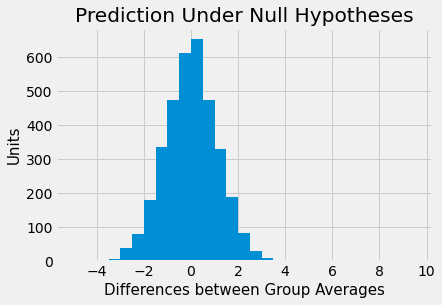

In [37]:
#7

differences_df.hist(bins = np.arange(-5,10,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15)
plt.scatter(observed_difference, 0, color='red', s=200)


In [23]:
shuffled_Age = shuffled['Maternal Age']
type(shuffled_Age)

pandas.core.series.Series

In [24]:
original_and_shuffled= data.assign(shuffled_weights=shuffled_Age.values )
original_and_shuffled

,Maternal Age,Maternal Smoker,shuffled_weights
0,27,False,21
1,33,False,23
2,28,True,23
3,23,True,25
4,25,False,25
...,...,...,...
1169,27,False,28
1170,24,False,29
1171,30,True,38
1172,21,False,34


In [25]:
all_group_means= original_and_shuffled.groupby('Maternal Age').mean()
all_group_means

,Maternal Smoker,shuffled_weights
Maternal Age,,
15,1.000000,24.000000
17,0.428571,28.571429
18,0.733333,28.933333
19,0.326531,27.714286
20,0.526316,26.894737
21,0.415385,27.523077
22,0.415584,26.324675
23,0.455556,27.855556
24,0.325301,26.819277


The empirical P-value is 0, meaning that none of the 3,500 observed samples resulted in a difference of 9.27 or lower. This is an approximation; the exact chance of getting a difference in that range is not 0 but it is vanishingly small.

As the test statistic falls in critical

The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent.

The conclusion of the test is that the data support the alternative more than they support the null. The average birth weight of babies born to mothers who smoke is less than the average birth weight of babies born to non-smokers.